## Analysis of causal model regression on depolarized Bell states


In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt

from foqal.utils.io import IO
from foqal.utils.style import StyleConfig
from experiments.causal.visualizations import model_comparison

In [5]:
io = IO.directory(
    folder="simulated-data-causal-two-qubit-depolarizing",
    include_date=False, include_id=False, verbose=False,
)

df = io.load_dataframe("results/regression_summary.txt")

In [6]:
df

,model,m,p,latent_dim,train_loss,test_loss,kl_test_train,t,lr,n_steps
0,ClassicalCommonCause,5,0.0,100,NaN,NaN,0.000309,2.102813,0.1,2200
1,Superdeterminism,5,0.0,100,NaN,NaN,0.000309,3.055312,0.1,2200
2,Superluminal,5,0.0,100,NaN,NaN,0.000309,2.145373,0.1,2200
3,QuantumCommonCause,5,0.0,2,0.000122,0.000193,0.000309,6.121697,0.1,2200
4,ClassicalCommonCause,5,0.1,100,0.000878,0.001029,0.000394,2.134832,0.1,2200
...,...,...,...,...,...,...,...,...,...,...
655,QuantumCommonCause,130,0.9,2,0.000188,0.000191,0.000375,20.734100,0.1,7200
656,ClassicalCommonCause,130,1.0,130,0.000124,0.000251,0.000376,19.092892,0.1,7200
657,Superdeterminism,130,1.0,130,0.000063,0.000311,0.000376,28.840483,0.1,7200
658,Superluminal,130,1.0,130,0.000062,0.000315,0.000376,33.920719,0.1,7200


In [15]:
%%capture
fig, axs = model_comparison(df)

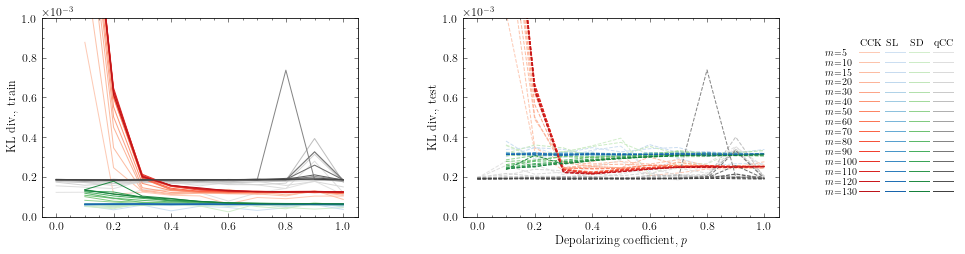

In [16]:
for ax in axs:
    ax.set_yscale("linear")
    ax.set(ylim=[0, 0.001])
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[0].set(ylabel="KL div., train")
axs[1].set(ylabel="KL div., test")
fig

In [10]:
io_save = IO(path=IO.render_path.joinpath("causal-models"))
style = StyleConfig()
style.save_figure(fig, filename=str(io_save.path.joinpath("depolarized-bell-state.pdf")))

Saving to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\foqal\renders\causal-models\depolarized-bell-state.pdf


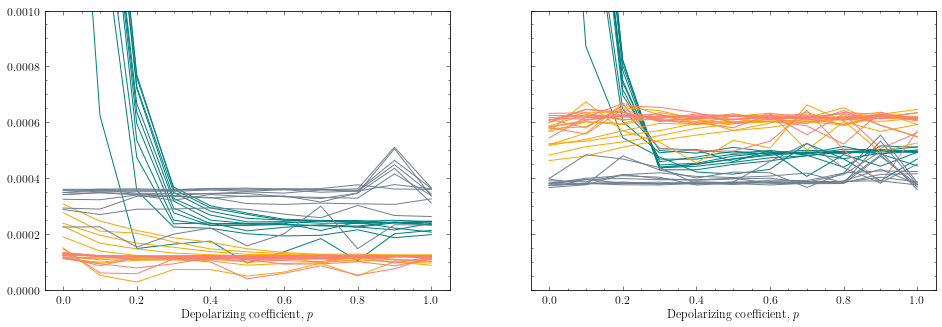

In [15]:
models = df['model'].unique()
colors = ['teal', 'orange', 'salmon', 'slategrey']

ms = df['m'].unique()
ps = df['p'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15, 5], sharey='row')
for model, color in zip(models, colors):
    for m in ms:
        train = []
        test = []
        test_std = []
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            train.append(dfi[f'train_loss'].min())
            test.append(dfi[f'test_loss'].min())

        axs[0].plot(ps, train, color=color, label=f"{model}")
        axs[1].plot(ps, test, color=color)

for ax in axs:
    ax.set(xlabel='Depolarizing coefficient, $p$')
    ax.set(ylim=[0, 0.001])